In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## missing and filling values

In [18]:
# Import data
co2_levels = pd.read_csv('../data/ch2_co2_levels.csv')

# Display first seven rows of co2_levels
#print(co2_levels.head(7))

co2_levels['datestamp'] = pd.to_datetime(co2_levels['datestamp'])
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

# Impute missing values with the next valid observation
co2_levels = co2_levels.bfill()

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64
co2    0
dtype: int64


## Plot aggregating data

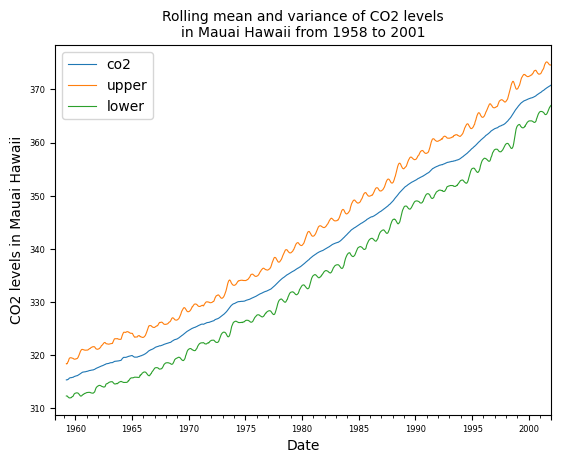

In [19]:
# Compute the 52 weeks rolling mean of co2_levels and assign it to ma
ma = co2_levels.rolling(window=52).mean()
# Compute the 52 weeks rolling standard deviation of co2_levels and assign it to mstd
mstd = co2_levels.rolling(window=52).std()

# Calculate the upper bound of time series which can defined as the rolling mean + (2 * rolling standard deviation) and assign it to ma[upper]. 
ma['upper'] = ma['co2'] + (2 * mstd['co2'])
# Similarly, calculate the lower bound as the rolling mean - (2 * rolling standard deviation) and assign it to ma[lower].
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

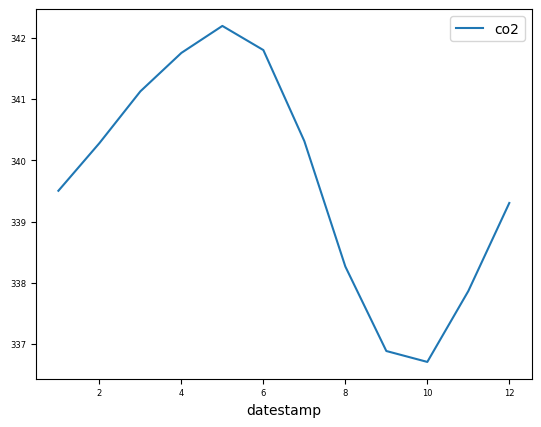

In [25]:
# Extract the month for each of the dates in the index of the co2_levels DataFrame and assign the values to a variable called index_month
index_month = co2_levels.index.month 

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

## Summarize the value

               co2
count  2225.000000
mean    340.142247
std      17.003885
min     313.000000
25%     324.800000
50%     338.300000
75%     354.800000
max     373.900000
313.0
373.9


C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_65812\2030451924.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


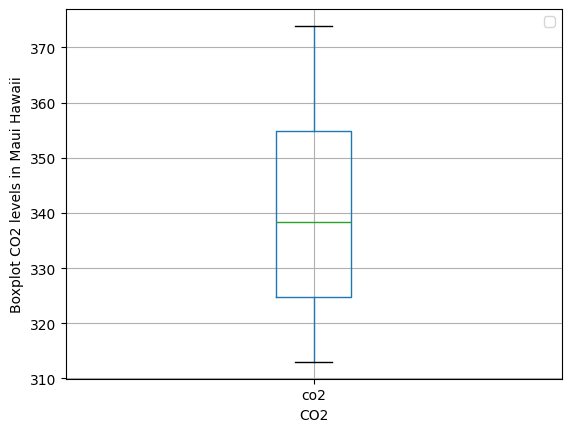

In [53]:
# Import data
co2_levels = pd.read_csv('../data/ch2_co2_levels.csv')

# Display first seven rows of co2_levels
#print(co2_levels.head(7))

co2_levels['datestamp'] = pd.to_datetime(co2_levels['datestamp'])
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')
# Print out summary statistics of the co2_levels DataFrame
x = co2_levels.describe()
print(x)

# Print out the minima of the co2 column in the co2_levels DataFrame
print(x.loc['min'].iloc[0])
# Print out the maxima of the co2 column in the co2_levels DataFrame
print(x.loc['max'].iloc[0])

# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

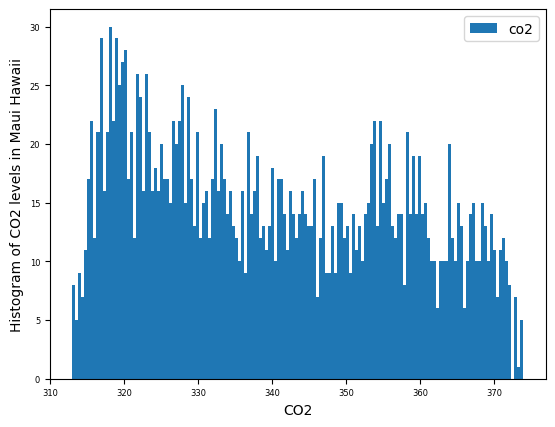

In [55]:
# produce a histogram plot of the CO2 level data with 50 bins.
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=150, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

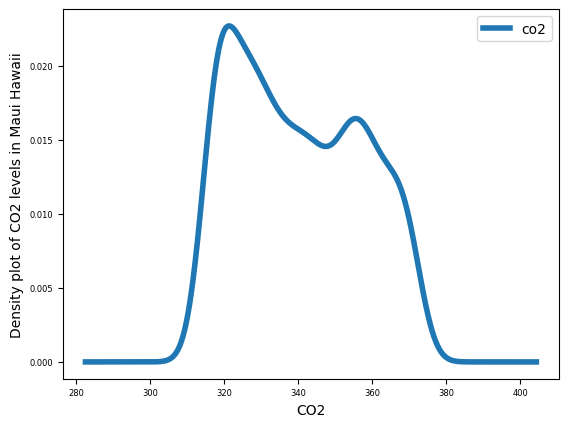

In [56]:
# produce a density plot of the CO2 level data with line width parameter of 4.
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()